In [6]:
import pandas
import numpy
import matplotlib.pyplot as plot
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


In [7]:
# encode labels into tensor compatible labels
def encode_labels(labels):
    encoder = LabelEncoder()
    encoder.fit(labels)
    # to numbers [0, 0, ..., 1, 1, ..., 2, 2]
    encoded_labels = encoder.transform(labels)
    # to categories ([0, 0, 1], [0, 1, 0], [1, 0, 0]) 
    return to_categorical(encoded_labels)

# parse input from csv

dataframe = pandas.read_csv("iris.csv", header=None)
dataset = dataframe.values

# for evaluation take 5 cases from every category
# intervals -> [0; 5] + [50; 55] + [100; 105]

X_eval = dataset[0:5,0:4].astype(float)
X_eval = numpy.concatenate((X_eval, dataset[50:55,0:4].astype(float)))
X_eval = numpy.concatenate((X_eval, dataset[100:105,0:4].astype(float)))

Y_eval = dataset[0:5,4]
Y_eval = numpy.concatenate((Y_eval, dataset[50:55,4]))
Y_eval = numpy.concatenate((Y_eval, dataset[100:105,4]))
Y_eval = encode_labels(Y_eval)

# for training take rest of the cases:
# (5; 50) + (55; 100) + (105; 150)

X_train = dataset[5:50,0:4].astype(float)
X_train = numpy.concatenate((X_train, dataset[55:100,0:4].astype(float)))
X_train = numpy.concatenate((X_train, dataset[105:150,0:4].astype(float)))

Y_train = dataset[5:50,4]
Y_train = numpy.concatenate((Y_train, dataset[55:100,4]))
Y_train = numpy.concatenate((Y_train, dataset[105:150,4]))
Y_train = encode_labels(Y_train)

def print_fit_stat(model):
    print("Eval:")
    model.evaluate(X_eval, Y_eval, verbose=2)
    print("Predict (perfect is [1, 0, 0]):")
    print(model.predict([[5.1,3.5,1.4,0.2]]))

def compile_and_fit(model):
    model.compile(optimizer='adam',loss='categorical_crossentropy',
    metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=20, batch_size=10,
    validation_split=0.1, verbose=0)
    print_fit_stat(model)
    return history

Model 1 (16n):


2022-12-08 12:49:34.195171: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 12:49:34.197496: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-08 12:49:34.197586: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-12-08 12:49:34.197638: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-12-08 12:49:34.197695: W tensorflow/c

Eval:
1/1 - 0s - loss: 0.8706 - accuracy: 0.6667 - 17ms/epoch - 17ms/step
Predict (perfect is [1, 0, 0]):
1/1 [==============================] - 0s 64ms/step
[[0.53020614 0.23494828 0.23484549]]
Model 2 (32n):
Eval:
1/1 - 0s - loss: 0.5138 - accuracy: 0.9333 - 19ms/epoch - 19ms/step
Predict (perfect is [1, 0, 0]):
1/1 [==============================] - 0s 50ms/step
[[0.8356222  0.10317858 0.06119917]]
Model 3 (64n):
Eval:
1/1 - 0s - loss: 0.4075 - accuracy: 1.0000 - 17ms/epoch - 17ms/step
Predict (perfect is [1, 0, 0]):
1/1 [==============================] - 0s 50ms/step
[[0.94090813 0.04585002 0.01324189]]


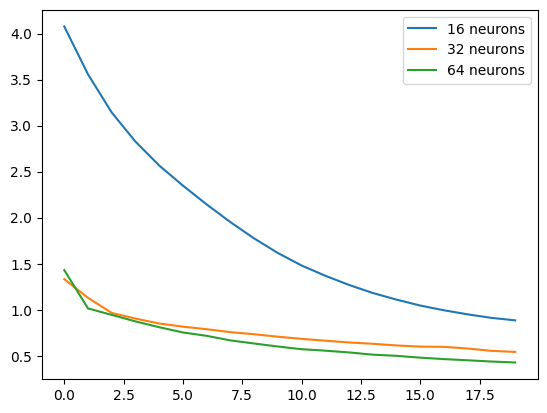

<Figure size 640x480 with 0 Axes>

In [8]:
print("Model 1 (16n):")
his = compile_and_fit(Sequential([
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
]))
plot.plot(his.history["loss"], label="16 neurons")

print("Model 2 (32n):")
his = compile_and_fit(Sequential([
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
]))
plot.plot(his.history["loss"], label="32 neurons")

print("Model 3 (64n):")
his = compile_and_fit(Sequential([
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
]))
plot.plot(his.history["loss"], label="64 neurons")
plot.legend()
plot.show()
plot.clf()

1x 16n layer:
Eval:
1/1 - 0s - loss: 0.7208 - accuracy: 0.6667 - 18ms/epoch - 18ms/step
Predict (perfect is [1, 0, 0]):
1/1 [==============================] - 0s 51ms/step
[[0.25531358 0.4843695  0.260317  ]]
2x 16n layers:
Eval:
1/1 - 0s - loss: 0.3320 - accuracy: 1.0000 - 16ms/epoch - 16ms/step
Predict (perfect is [1, 0, 0]):
1/1 [==============================] - 0s 58ms/step
[[0.8401065 0.1581105 0.001783 ]]
3x 16n layers:
Eval:
1/1 - 0s - loss: 0.2755 - accuracy: 1.0000 - 19ms/epoch - 19ms/step
Predict (perfect is [1, 0, 0]):
1/1 [==============================] - 0s 60ms/step
[[0.9871144  0.01113022 0.00175536]]
4x 16n layers:
Eval:
1/1 - 0s - loss: 0.0535 - accuracy: 1.0000 - 16ms/epoch - 16ms/step
Predict (perfect is [1, 0, 0]):
1/1 [==============================] - 0s 62ms/step
[[0.9811178  0.01672894 0.00215336]]


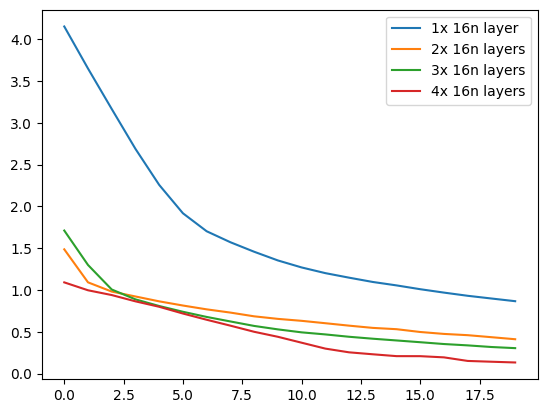

<Figure size 640x480 with 0 Axes>

In [9]:
print("1x 16n layer:")
his = compile_and_fit(Sequential([
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
]))
plot.plot(his.history["loss"], label="1x 16n layer")

print("2x 16n layers:")
his = compile_and_fit(Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
]))
plot.plot(his.history["loss"], label="2x 16n layers")

print("3x 16n layers:")
his = compile_and_fit(Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
]))
plot.plot(his.history["loss"], label="3x 16n layers")

print("4x 16n layers:")
his = compile_and_fit(Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
]))
plot.plot(his.history["loss"], label="4x 16n layers")

plot.legend()
plot.show()
plot.clf()